
# Evaluation Explorer Notebook

This notebook provides exploratory data analysis (EDA) for the `full_evaluation_results.csv` file.

It includes:
- Dataset overview
- Policy comparison plots
- Time dynamics (defender & attacker)
- Action distributions
- Robustness across replicates

Adjust paths and parameters as needed.


In [56]:

import os
import ast
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(style="whitegrid")

# Path to your CSV file
csv_path = "/home/chris/Desktop/bayesian-security-games/drone_results_TEST.csv"


df = pd.read_csv(csv_path)
print(df.shape)
df.head(10)


(2700, 21)


config_file     policy  replicate        seed  \
0  SEED_0_FLAT(1.0, 1.0, 1.0)i0  Boltzmann          0   910077502   
1  SEED_0_FLAT(1.0, 1.0, 1.0)i0     H2S-H3          0  2918464466   
2  SEED_0_FLAT(1.0, 1.0, 1.0)i0        AMG          0  1137234544   
3  SEED_0_FLAT(1.0, 1.0, 1.0)i0        ADP          0  1551545689   
4  SEED_0_FLAT(1.0, 1.0, 1.0)i0         MC          0   904592125   
5  SEED_0_FLAT(1.0, 1.0, 1.0)i1  Boltzmann          0  4177833417   
6  SEED_0_FLAT(1.0, 1.0, 1.0)i1     H2S-H3          0  3635546764   
7  SEED_0_FLAT(1.0, 1.0, 1.0)i1        AMG          0  4045332100   
8  SEED_0_FLAT(1.0, 1.0, 1.0)i1        ADP          0   867075346   
9  SEED_0_FLAT(1.0, 1.0, 1.0)i1         MC          0  1478170485   

   avg_comp_time  atk_avg_util  atk_tot_util  def_avg_util  def_tot_util  \
0       0.010614      0.516810     15.504292     -1.206621    -36.198612   
1       0.032999      0.646012     19.380363     -1.274859    -38.245780   
2       0.026420      0.646012     19.380363     -1.274859    -38.245780   
3       0.133585      0.258405      7.752146     -0.988090    -29.642700   
4       0.020352      0.516810     15.504292     -1.188716    -35.661465   
5       0.000487      0.387607     11.628219     -1.200248    -36.007430   
6       0.000505      0.387607     11.628219     -1.214419    -36.432556   
7       0.000358      0.646012     19.380363     -1.274859    -38.245780   
8       0.102957      0.775215     23.256435     -1.121423    -33.642700   
9       0.005154      0.258405      7.752146     -1.122049    -33.661465   

                                     atk_action_dist  ... joint_action_dist  \
0  [0.16666666666666666, 0.06666666666666667, 0.1...  ...               NaN   
1  [0.03333333333333333, 0.23333333333333334, 0.1...  ...               NaN   
2  [0.1, 0.06666666666666667, 0.03333333333333333...  ...               NaN   
3  [0.2, 0.1, 0.16666666666666666, 0.066666666666...  ...               NaN   
4  [0.13333333333333333, 0.16666666666666666, 0.1...  ...               NaN   
5  [0.1, 0.1, 0.1, 0.1, 0.03333333333333333, 0.16...  ...               NaN   
6  [0.1, 0.06666666666666667, 0.26666666666666666...  ...               NaN   
7  [0.13333333333333333, 0.13333333333333333, 0.0...  ...               NaN   
8  [0.26666666666666666, 0.03333333333333333, 0.1...  ...               NaN   
9  [0.2, 0.16666666666666666, 0.23333333333333334...  ...               NaN   

   window_size  window_ids  atk_win_means  def_win_means  adv_win_means  \
0          NaN         NaN            NaN            NaN            NaN   
1          NaN         NaN            NaN            NaN            NaN   
2          NaN         NaN            NaN            NaN            NaN   
3          NaN         NaN            NaN            NaN            NaN   
4          NaN         NaN            NaN            NaN            NaN   
5          NaN         NaN            NaN            NaN            NaN   
6          NaN         NaN            NaN            NaN            NaN   
7          NaN         NaN            NaN            NaN            NaN   
8          NaN         NaN            NaN            NaN            NaN   
9          NaN         NaN            NaN            NaN            NaN   

                                    attacker_actions  \
0  [6, 6, 7, 1, 0, 7, 4, 2, 6, 2, 3, 0, 4, 5, 4, ...   
1  [4, 3, 2, 7, 5, 2, 1, 7, 1, 2, 1, 0, 1, 1, 7, ...   
2  [6, 7, 0, 7, 7, 7, 1, 4, 4, 5, 1, 6, 3, 4, 4, ...   
3  [6, 6, 1, 0, 2, 5, 4, 0, 2, 6, 5, 4, 7, 0, 0, ...   
4  [6, 2, 7, 0, 6, 0, 0, 7, 4, 5, 4, 2, 2, 1, 6, ...   
5  [6, 6, 2, 2, 6, 1, 4, 1, 5, 6, 5, 1, 0, 5, 7, ...   
6  [6, 2, 4, 4, 4, 6, 6, 6, 2, 7, 2, 0, 2, 4, 7, ...   
7  [6, 4, 7, 0, 4, 4, 4, 0, 3, 2, 7, 5, 2, 5, 0, ...   
8  [6, 0, 5, 7, 4, 6, 0, 3, 5, 3, 5, 0, 2, 2, 0, ...   
9  [6, 2, 3, 6, 6, 0, 3, 2, 1, 2, 0, 0, 0, 7, 2, ...   

                                    defender_actions  \
0  [2, 4, 6, 5, 4, 6, 5, 4, 0, 2, 4, 0, 5, 1, 0, ...  

In [57]:
#Clean up code a bit and parse configs

def parse_config_name(name: str):
    """
    Parse config name into components.

    Handles formats like:
      - "SEED_123_ACRL_A1_FLAT_eps0.00_i0"  (original full form)
      - "SEED_0_FLAT(1.0, 1.0, 1.0)i0"      (new form with prior params)
      - fallback: a best-effort token split

    Returned keys:
      - model_seed: Optional[int]
      - attacker_type: Optional[str]
      - n_allowed_attacks: Optional[int]
      - prior: Optional[str]
      - prior_params: Optional[List[float]]
      - epsilon: Optional[float]
      - instance: Optional[int]
    """
    if pd.isna(name):
        return {
            "model_seed": None,
            "attacker_type": None,
            "n_allowed_attacks": None,
            "prior": None,
            "prior_params": None,
            "epsilon": None,
            "instance": None,
        }

    # 1) original full pattern: SEED_<seed>_<attacker>_A<k>_<prior>_eps<eps>_i<inst>
    m = re.match(
        r"^SEED_(\d+)_([A-Za-z]+)_A(\d+)_([A-Za-z]+)_eps([0-9.]+)_i(\d+)$", name
    )
    if m:
        return {
            "model_seed": int(m.group(1)),
            "attacker_type": m.group(2),
            "n_allowed_attacks": int(m.group(3)),
            "prior": m.group(4),
            "prior_params": None,
            "epsilon": float(m.group(5)),
            "instance": int(m.group(6)),
        }

    # 2) new form with prior parameters: SEED_<seed>_<PRIOR>(p1, p2, p3)i<inst>
    m2 = re.match(r"^SEED_(\d+)_([A-Za-z0-9]+)\s*\(\s*([0-9eE+.\-,\s]+)\s*\)i(\d+)$", name)
    if m2:
        seed = int(m2.group(1))
        prior = m2.group(2)
        params_str = m2.group(3)
        # split on comma and convert to floats, ignore empty pieces
        params = [float(p) for p in re.split(r"\s*,\s*", params_str.strip()) if p != ""]
        return {
            "model_seed": seed,
            "attacker_type": None,
            "n_allowed_attacks": None,
            "prior": prior,
            "utility_params": params,
            "epsilon": None,
            "instance": int(m2.group(4)),
        }

    # 3) relaxed pattern: allow optional seed and attacker (best-effort)
    # try to parse pieces separated by underscores
    tokens = name.split("_")
    out = {
        "model_seed": None,
        "attacker_type": None,
        "n_allowed_attacks": None,
        "prior": None,
        "utility_params": None,
        "epsilon": None,
        "instance": None,
    }

    # try to extract seed if first token starts with SEED
    if tokens and tokens[0].startswith("SEED"):
        # may be like "SEED" or "SEED123" or "SEED-123"
        seed_match = re.match(r"SEED[_-]?(\d+)$", tokens[0])
        if seed_match:
            out["model_seed"] = int(seed_match.group(1))
        elif len(tokens) > 1 and tokens[1].isdigit():
            out["model_seed"] = int(tokens[1])

    # scan tokens for known patterns
    for t in tokens:
        if t.startswith("A") and t[1:].isdigit():
            out["n_allowed_attacks"] = int(t[1:])
        if t.startswith("eps"):
            try:
                out["epsilon"] = float(t.replace("eps", ""))
            except ValueError:
                pass
        if t.startswith("i") and t[1:].isdigit():
            out["instance"] = int(t[1:])
        # a token that looks like a plain uppercase prior (e.g., FLAT)
        if re.fullmatch(r"[A-Z0-9]+", t):
            out["prior"] = t

    return out

parsed = df["config_file"].apply(parse_config_name)
parsed_df = pd.DataFrame(parsed.tolist())

# --- Merge parsed fields ---
df = pd.concat([df, parsed_df], axis=1)

df = df.dropna(axis=1, how="all")

# Ensure epsilon and prior are treated as categorical for plotting
df["prior"] = df["prior"].astype(str)

# Separate data by distince EWA draws
df["model_seed"] = df["model_seed"].astype(str)

df_opponent_0 = df[df["model_seed"] == "0"].copy()
df_opponent_1 = df[df["model_seed"] == "1"].copy()
df_opponent_2 = df[df["model_seed"] == "2"].copy()

In [58]:
#Split dataframes into games with single and two action choices
df["model_seed"] = df["model_seed"].astype(str)
df["utility_params"] = df["utility_params"].astype(str)


In [59]:
df1 = df[df["model_seed"] == "0"]
print(df.head(1))

                    config_file     policy  replicate       seed  \
0  SEED_0_FLAT(1.0, 1.0, 1.0)i0  Boltzmann          0  910077502   

   avg_comp_time  atk_avg_util  atk_tot_util  def_avg_util  def_tot_util  \
0       0.010614       0.51681     15.504292     -1.206621    -36.198612   

                                     atk_action_dist  \
0  [0.16666666666666666, 0.06666666666666667, 0.1...   

                                     def_action_dist  \
0  [0.1, 0.06666666666666667, 0.13333333333333333...   

                                    attacker_actions  \
0  [6, 6, 7, 1, 0, 7, 4, 2, 6, 2, 3, 0, 4, 5, 4, ...   

                                    defender_actions  \
0  [2, 4, 6, 5, 4, 6, 5, 4, 0, 2, 4, 0, 5, 1, 0, ...   

                                  attacker_utilities  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                  defender_utilities model_seed prior  \
0  [-1.7317817211151123, -0.8046423196792603, -0....          0  FLAT   

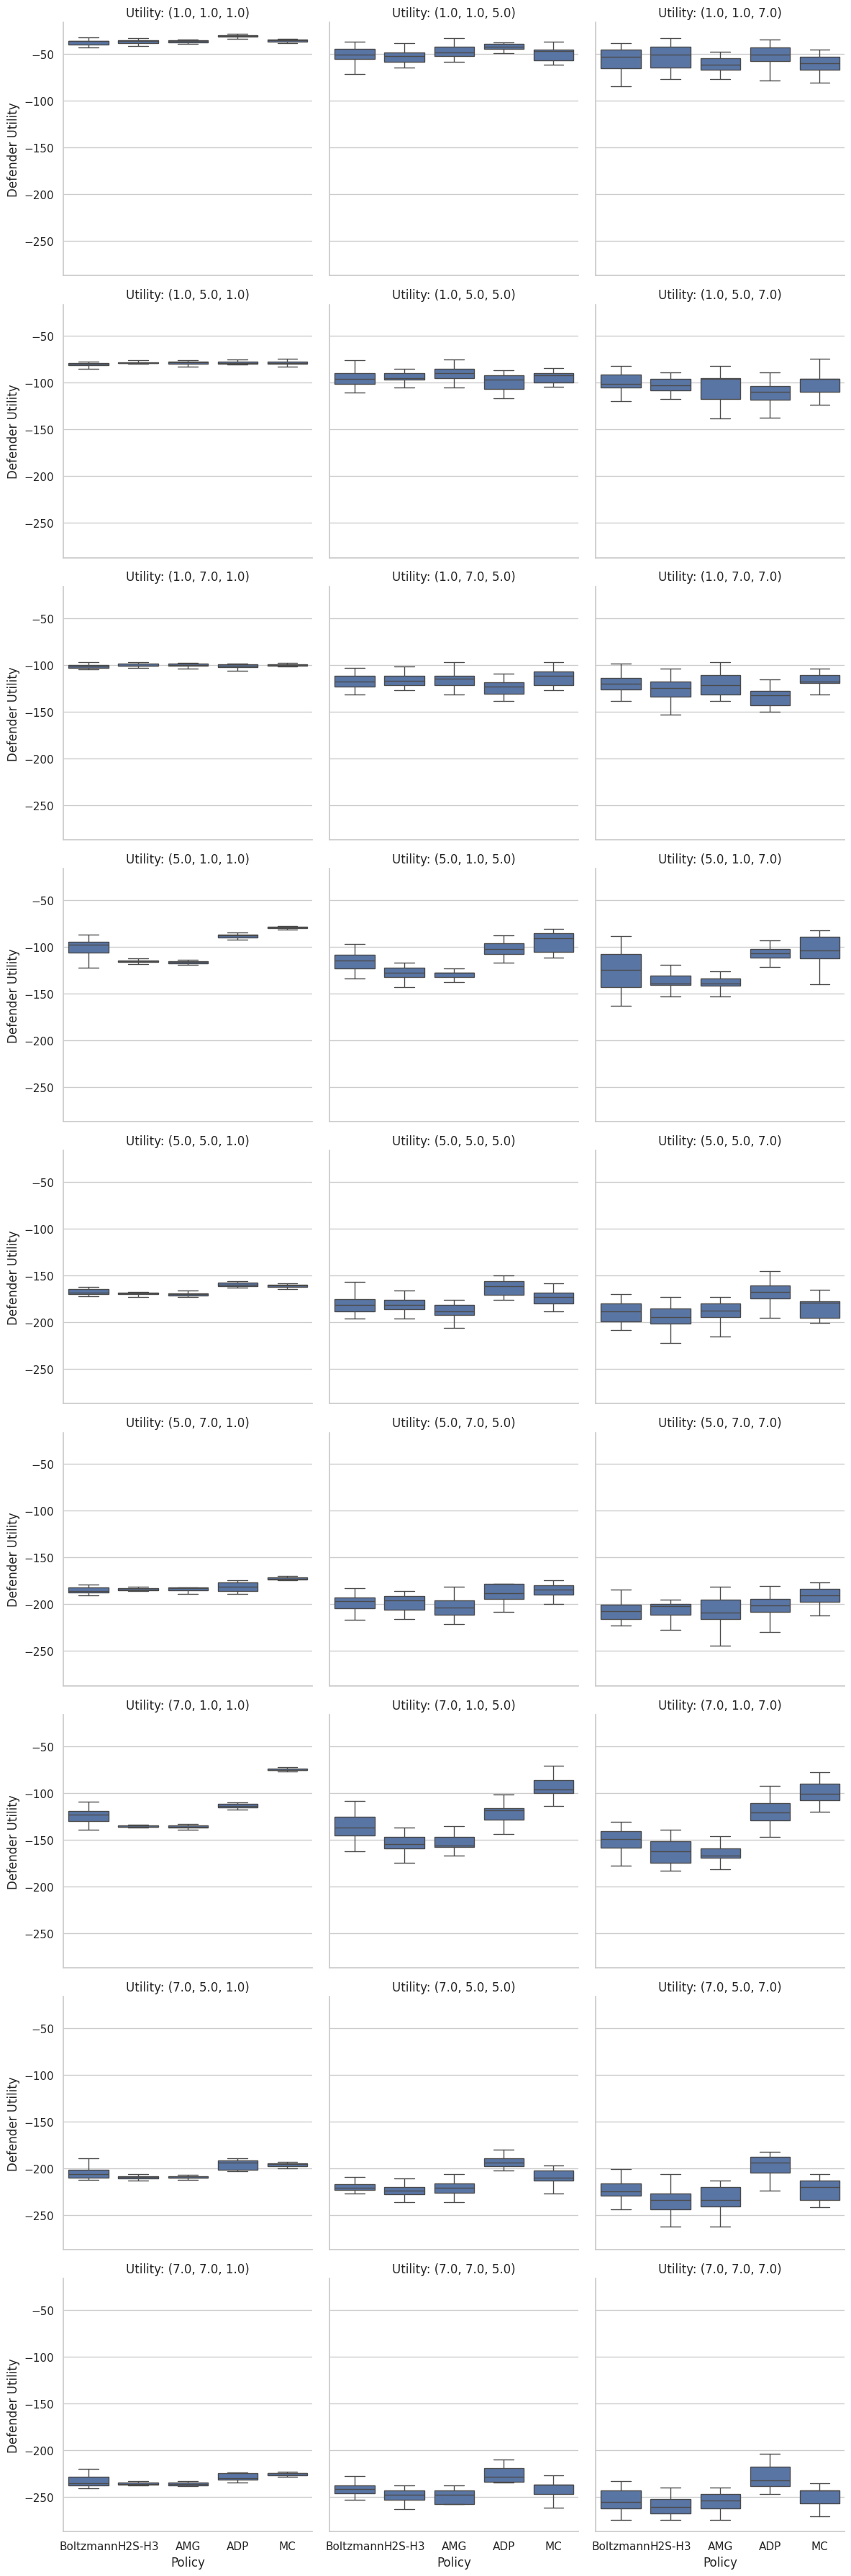

In [60]:
# --- 1. Safe parser ---
def safe_parse_utility(x):
    """Converts string '[1,2,3]' → [1,2,3], pads/truncates to length 3."""
    if isinstance(x, str):
        try:
            x = ast.literal_eval(x)
        except Exception:
            return [np.nan, np.nan, np.nan]
    if isinstance(x, (list, tuple, np.ndarray)):
        x = list(x)
    else:
        return [np.nan, np.nan, np.nan]
    # Pad or truncate to exactly length 3
    while len(x) < 3:
        x.append(np.nan)
    return x[:3]

# --- 2. Apply parser ---
df["utility_params_parsed"] = df["utility_params"].apply(safe_parse_utility)

# --- 3. Expand safely into columns ---
df[["u1", "u2", "u3"]] = pd.DataFrame(df["utility_params_parsed"].tolist(), index=df.index)

# --- 4. Create utility combination labels ---
df["utility_combo"] = df.apply(lambda x: f"({x.u1}, {x.u2}, {x.u3})", axis=1)

# --- 5. FacetGrid plot ---
g = sns.FacetGrid(
    df,
    col="utility_combo",
    col_wrap=3,
    sharey=True,
    height=4
)
g.map_dataframe(sns.boxplot, x="policy", y="def_tot_util", showfliers=False)
g.set_axis_labels("Policy", "Defender Utility")
g.set_titles("Utility: {col_name}")
plt.tight_layout()
plt.show()

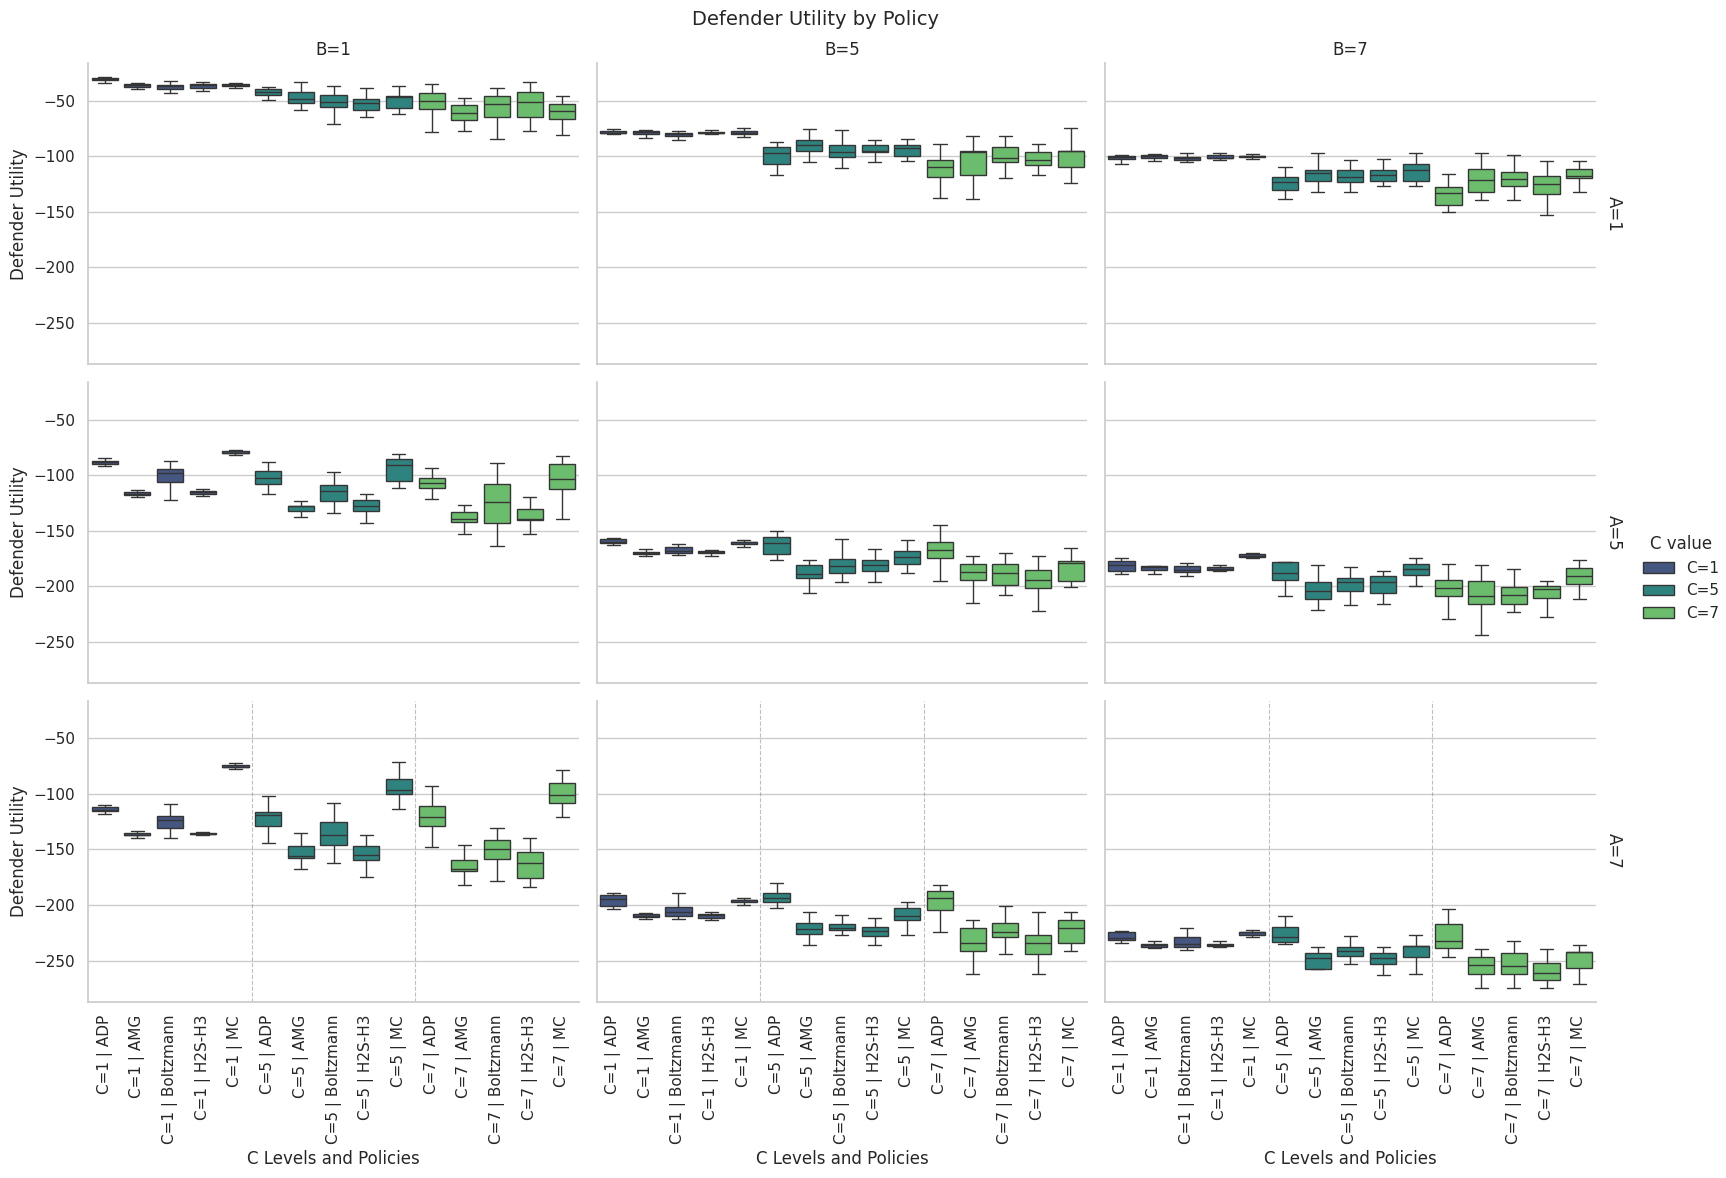

In [61]:
# --- Label mapping for easy customization ---
# Change these if you want different parameter symbols
param_labels = {
    "u1": "A",
    "u2": "B",
    "u3": "C"
}

# --- Ensure numeric and create labeled versions ---
for u in ["u1", "u2", "u3"]:
    df[u] = df[u].astype(float)
    df[f"{u}_label"] = df[u].apply(lambda x, u=u: f"{param_labels[u]}={x:g}")

# --- Composite category for grouped x-axis (C group → policies) ---
df["C_policy"] = df["u3_label"] + " | " + df["policy"]

# --- Consistent ordering ---
u3_order = sorted(df["u3"].unique())
policy_order = sorted(df["policy"].unique())
C_policy_order = [f"{param_labels['u3']}={u3:g} | {p}" for u3 in u3_order for p in policy_order]

# --- Build FacetGrid (rows = A, cols = B) ---
g = sns.FacetGrid(
    df,
    row=f"u1_label",   # A on rows
    col=f"u2_label",   # B on columns
    margin_titles=True,
    height=4,
    aspect=1.3
)

# --- Map boxplots (color by C) ---
g.map_dataframe(
    sns.boxplot,
    x="C_policy",
    y="def_tot_util",
    hue="u3_label",
    order=C_policy_order,
    palette="viridis",
    showfliers=False,
    dodge=False
)

# --- Aesthetics ---
# --- Formatting ---
g.set_axis_labels("C Levels and Policies", "Defender Utility")
g.set_titles(
    row_template="{row_name}",    # removes 'u1_label ='
    col_template="{col_name}"     # removes 'u2_label ='
)

g.fig.suptitle(f"Defender Utility by Policy", fontsize=14)
g.fig.subplots_adjust(top=0.85, right=0.83)  # make space for legend

# Move legend to right of plot
g.add_legend(title="C value")
leg = g._legend
leg.set_bbox_to_anchor((1.02, 0.5))   # move outside right
leg._loc = 10                         # center vertically
leg.set_frame_on(False)

# Rotate tick labels for clarity
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
    # Add vertical dashed lines to visually separate u3 groups (every 5 policies)
    labels = [t.get_text() for t in ax.get_xticklabels()]
    for i in range(len(policy_order), len(labels), len(policy_order)):
        ax.axvline(i - 0.5, color="gray", linestyle="--", linewidth=0.8, alpha=0.5)

plt.tight_layout()
plt.show()

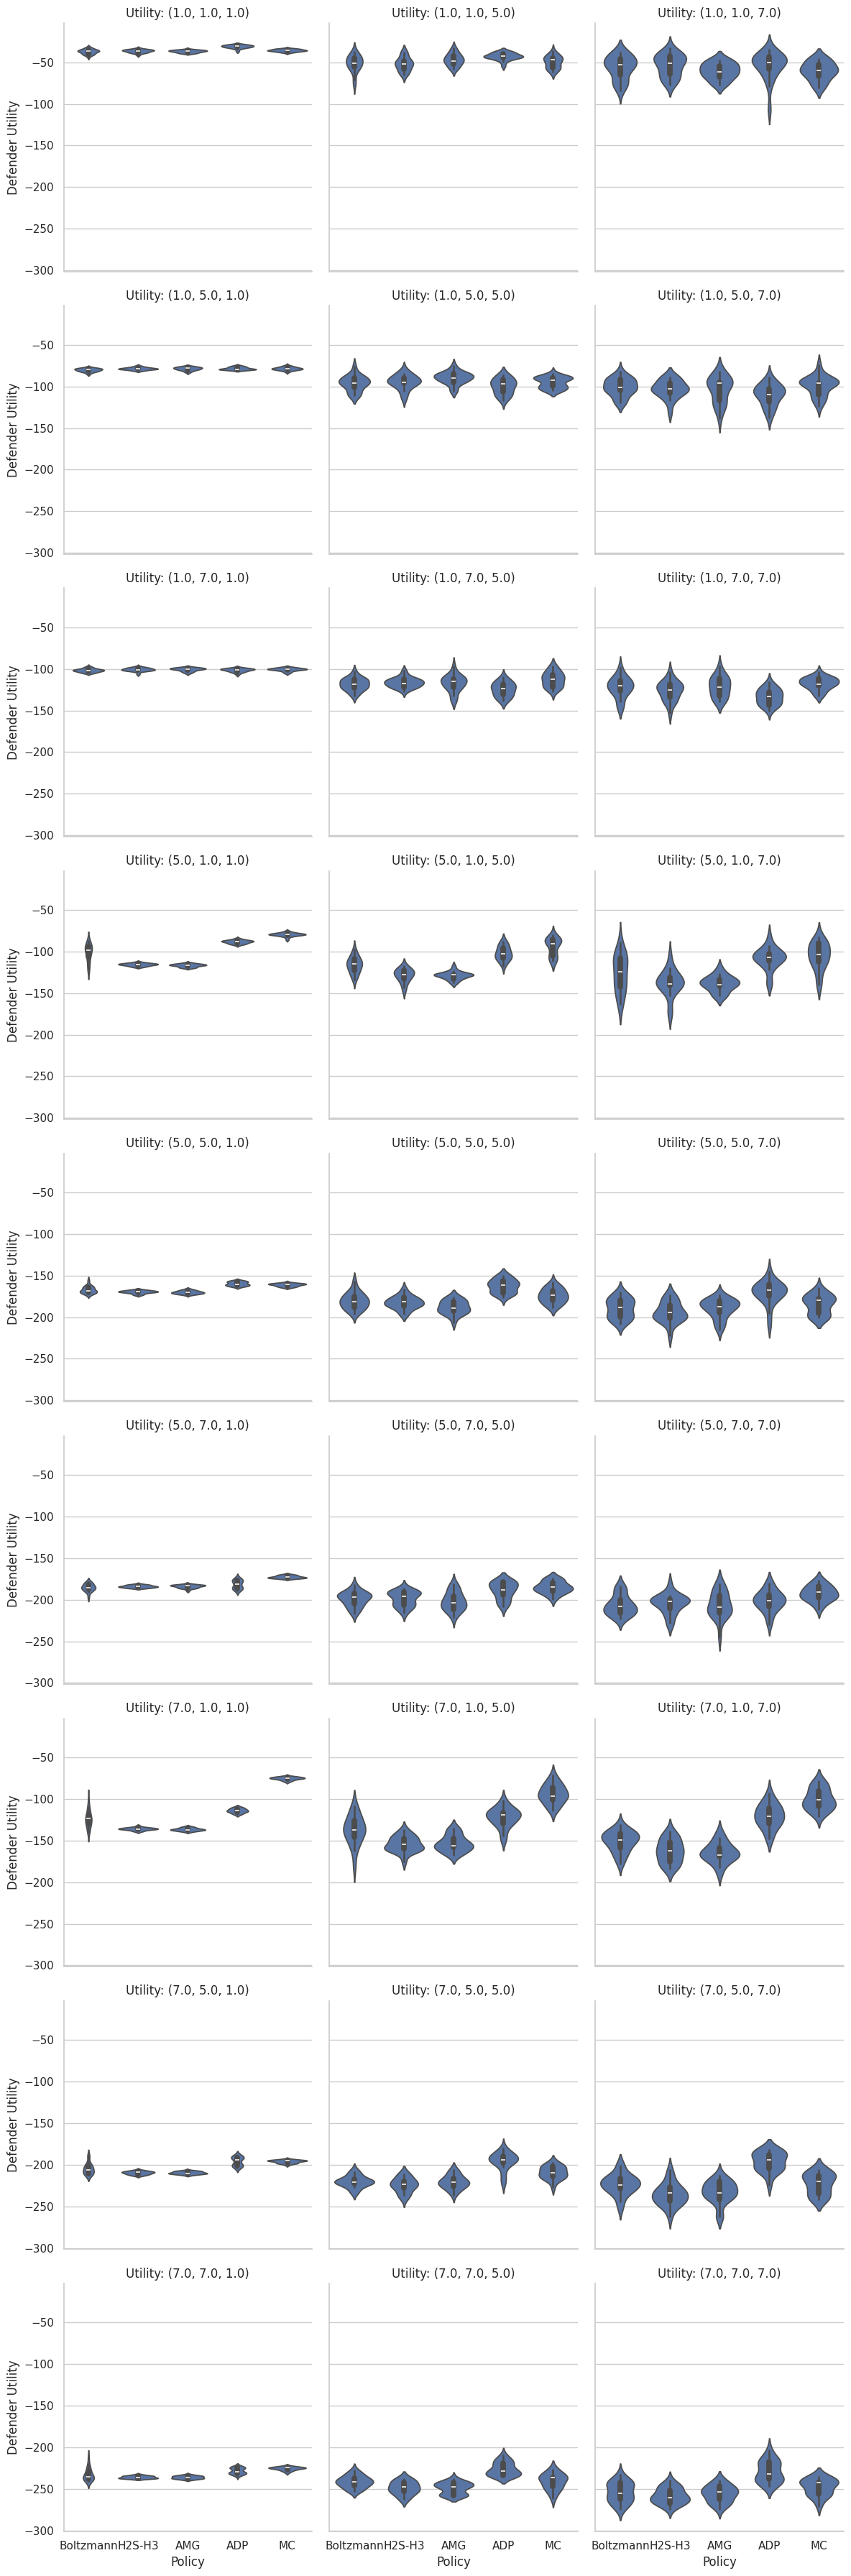

In [62]:
g = sns.FacetGrid(
    df,
    col='utility_combo',
    col_wrap=3,   # Adjust how many per row
    sharey=True,
    height=4
)

g.map_dataframe(sns.violinplot, x='policy', y='def_tot_util')
g.set_axis_labels("Policy", "Defender Utility")
g.set_titles("Utility: {col_name}")
plt.tight_layout()
plt.show()

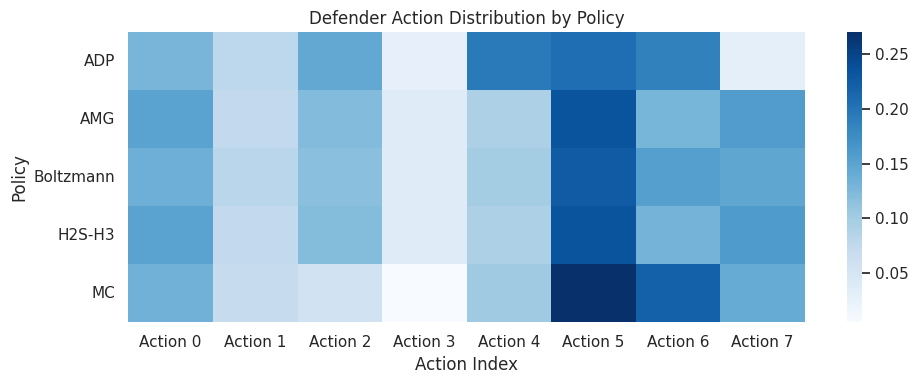

In [63]:
df = df_opponent_0

def safe_parse_array(x):
    if isinstance(x, str):
        try:
            return np.array(ast.literal_eval(x))
        except (ValueError, SyntaxError):
            return np.nan  # or leave it as-is if you prefer
    elif isinstance(x, (list, np.ndarray)):
        return np.array(x)
    else:
        return np.nan

df["def_action_dist"] = df["def_action_dist"].apply(safe_parse_array)
df["atk_action_dist"] = df["atk_action_dist"].apply(safe_parse_array)

# Compute mean distributions across replicates per policy
atk_means = df.groupby("policy")["atk_action_dist"].apply(lambda x: np.mean(np.stack(x.values), axis=0))
def_means = df.groupby("policy")["def_action_dist"].apply(lambda x: np.mean(np.stack(x.values), axis=0))

# Plot defender heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(np.vstack(def_means.values), cmap="Blues", annot=False,
            xticklabels=[f"Action {i}" for i in range(len(def_means.iloc[0]))],
            yticklabels=def_means.index)
plt.title("Defender Action Distribution by Policy")
plt.xlabel("Action Index")
plt.ylabel("Policy")
plt.tight_layout()
plt.show()

In [64]:
#Break apart the utility records so we can plot over time

# If your column still looks like "[0.0, 0.0, -2.0, ...]"
def parse_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return []
    return x

df_opponent_0["defender_utilities"] = df_opponent_0["defender_utilities"].apply(parse_list)

print(type(df_opponent_0["defender_utilities"].iloc[0]))


df_long = df_opponent_0.explode("defender_utilities").reset_index(drop=True)

df_long["timestep"] = df_long.groupby(["config_file","policy", "replicate"]).cumcount()

df_long.rename(columns={"defender_utilities": "def_util"}, inplace=True)


df_opponent_0_exploded = df_long



<class 'list'>


In [65]:
df_opponent_0_exploded.head(5)

config_file     policy  replicate       seed  \
0  SEED_0_FLAT(1.0, 1.0, 1.0)i0  Boltzmann          0  910077502   
1  SEED_0_FLAT(1.0, 1.0, 1.0)i0  Boltzmann          0  910077502   
2  SEED_0_FLAT(1.0, 1.0, 1.0)i0  Boltzmann          0  910077502   
3  SEED_0_FLAT(1.0, 1.0, 1.0)i0  Boltzmann          0  910077502   
4  SEED_0_FLAT(1.0, 1.0, 1.0)i0  Boltzmann          0  910077502   

   avg_comp_time  atk_avg_util  atk_tot_util  def_avg_util  def_tot_util  \
0       0.010614       0.51681     15.504292     -1.206621    -36.198612   
1       0.010614       0.51681     15.504292     -1.206621    -36.198612   
2       0.010614       0.51681     15.504292     -1.206621    -36.198612   
3       0.010614       0.51681     15.504292     -1.206621    -36.198612   
4       0.010614       0.51681     15.504292     -1.206621    -36.198612   

                                     atk_action_dist  \
0  [0.16666666666666666, 0.06666666666666667, 0.1...   
1  [0.16666666666666666, 0.06666666666666667, 0.1...   
2  [0.16666666666666666, 0.06666666666666667, 0.1...   
3  [0.16666666666666666, 0.06666666666666667, 0.1...   
4  [0.16666666666666666, 0.06666666666666667, 0.1...   

                                     def_action_dist  \
0  [0.1, 0.06666666666666667, 0.13333333333333333...   
1  [0.1, 0.06666666666666667, 0.13333333333333333...   
2  [0.1, 0.06666666666666667, 0.13333333333333333...   
3  [0.1, 0.06666666666666667, 0.13333333333333333...   
4  [0.1, 0.06666666666666667, 0.13333333333333333...   

                                    attacker_actions  \
0  [6, 6, 7, 1, 0, 7, 4, 2, 6, 2, 3, 0, 4, 5, 4, ...   
1  [6, 6, 7, 1, 0, 7, 4, 2, 6, 2, 3, 0, 4, 5, 4, ...   
2  [6, 6, 7, 1, 0, 7, 4, 2, 6, 2, 3, 0, 4, 5, 4, ...   
3  [6, 6, 7, 1, 0, 7, 4, 2, 6, 2, 3, 0, 4, 5, 4, ...   
4  [6, 6, 7, 1, 0, 7, 4, 2, 6, 2, 3, 0, 4, 5, 4, ...   

                                    defender_actions  \
0  [2, 4, 6, 5, 4, 6, 5, 4, 0, 2, 4, 0, 5, 1, 0, ...   
1  [2, 4, 6, 5, 4, 6, 5, 4, 0, 2, 4, 0, 5, 1, 0, ...   
2  [2, 4, 6, 5, 4, 6, 5, 4, 0, 2, 4, 0, 5, 1, 0, ...   
3  [2, 4, 6, 5, 4, 6, 5, 4, 0, 2, 4, 0, 5, 1, 0, ...   
4  [2, 4, 6, 5, 4, 6, 5, 4, 0, 2, 4, 0, 5, 1, 0, ...   

                                  attacker_utilities  def_util model_seed  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -1.731782          0   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.804642          0   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.211703          0   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.211703          0   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -1.211703          0   

  prior   utility_params  instance  timestep  
0  FLAT  [1.0, 1.0, 1.0]         0         0  
1  FLAT  [1.0, 1.0, 1.0]         0         1  
2  FLAT  [1.0, 1.0, 1.0]         0         2  
3  FLAT  [1.0, 1.0, 1.0]         0         3  
4  FLAT  [1.0, 1.0, 1.0]         0         4

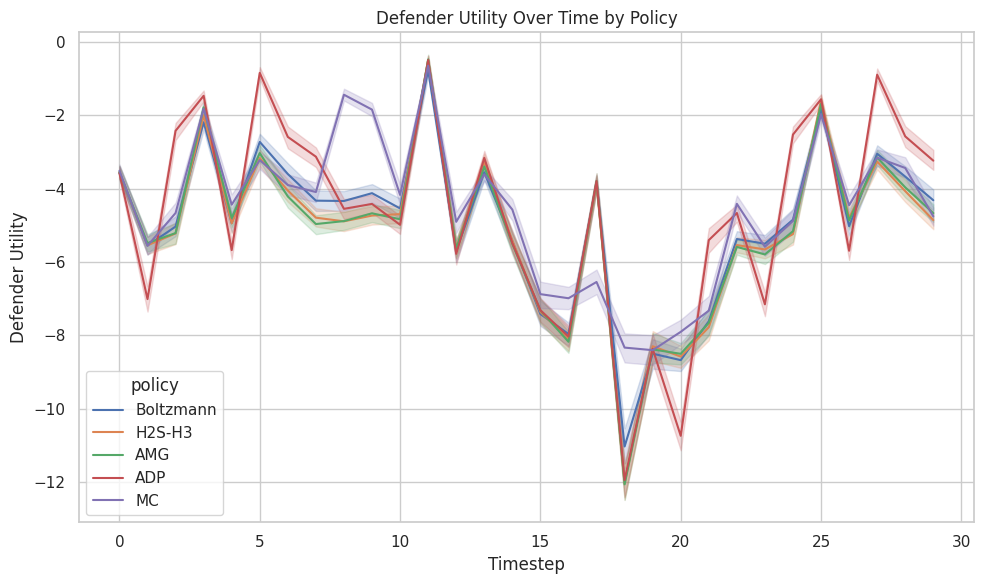

In [66]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_long,
    x="timestep",
    y="def_util",
    hue="policy",
    errorbar=("ci", 95)
)
plt.title("Defender Utility Over Time by Policy")
plt.xlabel("Timestep")
plt.ylabel("Defender Utility")
plt.tight_layout()
plt.show()


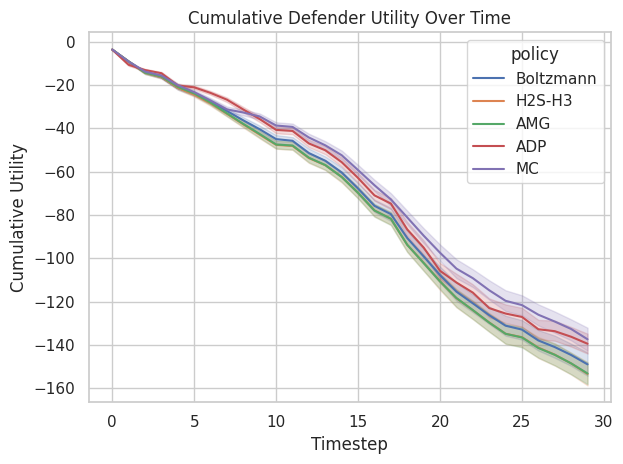

In [67]:
df_long["def_util"] = df_long["def_util"].astype(float)
df_long["cum_def_util"] = (
    df_long.groupby(["policy", "config_file", "replicate"])["def_util"].cumsum()
)

sns.lineplot(
    data=df_long, x="timestep", y="cum_def_util", hue="policy", errorbar=("ci", 95)
)
plt.title("Cumulative Defender Utility Over Time")
plt.xlabel("Timestep")
plt.ylabel("Cumulative Utility")
plt.tight_layout()
plt.show()


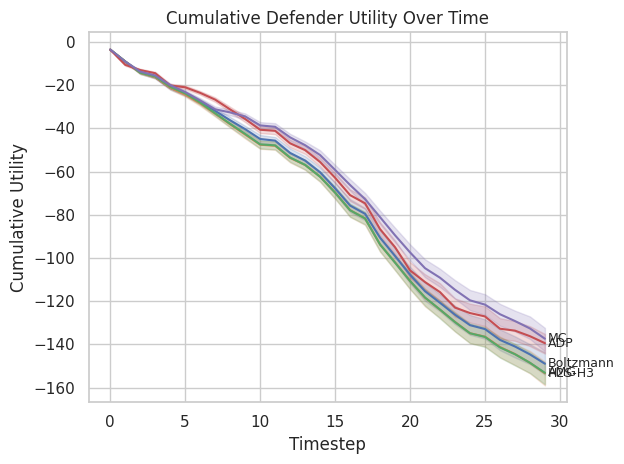

In [68]:

# Convert and compute cumulative utility
df_long["def_util"] = df_long["def_util"].astype(float)
df_long["cum_def_util"] = (
    df_long.groupby(["policy", "config_file", "replicate"])["def_util"].cumsum()
)

# Plot as usual
sns.lineplot(
    data=df_long, x="timestep", y="cum_def_util", hue="policy", errorbar=("ci", 95)
)

# Remove the legend box
plt.legend([], [], frameon=False)

# Add labels at the end of each line
for policy, grouped_df in df_long.groupby("policy"):
    # Get the last timestep for that policy (mean due to multiple replicates)
    last_point = (
        grouped_df.groupby("timestep")["cum_def_util"]
        .mean()
        .reset_index()
        .iloc[-1]
    )
    x = last_point["timestep"]
    y = last_point["cum_def_util"]

    plt.text(
        x + 0.2,  # small shift to the right
        y,
        policy,
        fontsize=9,
        verticalalignment="center"
    )

plt.title("Cumulative Defender Utility Over Time")
plt.xlabel("Timestep")
plt.ylabel("Cumulative Utility")
plt.tight_layout()
plt.show()

In [69]:
import ast
import numpy as np
import pandas as pd

def summarize_attack_defense(df, config_name, policy_name, replicate=0):
    """
    Given a results DataFrame, compute how many times each site was attacked
    and how many times it was successfully defended.

    A site is successfully defended if attacker_action != defender_action.
    
    Returns:
        attack_counts (dict): site_id -> number of attacks
        successful_defenses (dict): site_id -> number of successful defenses
    """

    # Filter to matching run
    subset = df[
        (df["config_file"] == config_name)
        & (df["policy"] == policy_name)
        & (df["replicate"] == replicate)
    ]

    if subset.empty:
        print(f"No match found for config='{config_name}', policy='{policy_name}', replicate={replicate}")
        return {}, {}

    row = subset.iloc[0]

    # Helper to parse stringified lists
    def parse_list(val):
        if isinstance(val, str):
            try:
                return ast.literal_eval(val)
            except Exception:
                return []
        return val

    attacker_actions = np.array(parse_list(row["attacker_actions"]))
    defender_actions = np.array(parse_list(row["defender_actions"]))

    # Determine site universe
    num_sites = int(max(attacker_actions.max(), defender_actions.max())) + 1

    # Count attacks per site
    attack_counts = {i: int(np.sum(attacker_actions == i)) for i in range(num_sites)}

    # Count successful defenses: attacker != defender at that timestep
    success_mask = attacker_actions != defender_actions
    successful_defenses = {i: int(np.sum((attacker_actions == i) & success_mask))
                           for i in range(num_sites)}

    # Pretty print summary
    print(f"\n=== Policy: {policy_name} ===")
    print(f"Config: {config_name}")
    print(f"Replicate: {replicate}")
    print("-" * 50)
    print(f"{'Site':<6}{'Attacked':>10}{'Defended':>15}")
    print("-" * 50)
    for i in range(num_sites):
        print(f"{i:<6}{attack_counts[i]:>10}{successful_defenses[i]:>15}")
    print("-" * 50)
    print(f"Total timesteps: {len(attacker_actions)}")
    print()


In [70]:
config_name = "SEED_0_FLAT(7.0, 5.0, 1.0)i1"

summarize_attack_defense(
    df,
    config_name=config_name,
    policy_name="ADP",
    replicate=0
)

summarize_attack_defense(
    df,
    config_name=config_name,
    policy_name="MC",
    replicate=0
)


=== Policy: ADP ===
Config: SEED_0_FLAT(7.0, 5.0, 1.0)i1
Replicate: 0
--------------------------------------------------
Site    Attacked       Defended
--------------------------------------------------
0              5              5
1              5              5
2              4              4
3              1              1
4              4              4
5              5              4
6              5              4
7              1              1
--------------------------------------------------
Total timesteps: 30


=== Policy: MC ===
Config: SEED_0_FLAT(7.0, 5.0, 1.0)i1
Replicate: 0
--------------------------------------------------
Site    Attacked       Defended
--------------------------------------------------
0              2              1
1              2              1
2              3              3
3              5              5
4              1              1
5              3              3
6              9              8
7              5              5
-------

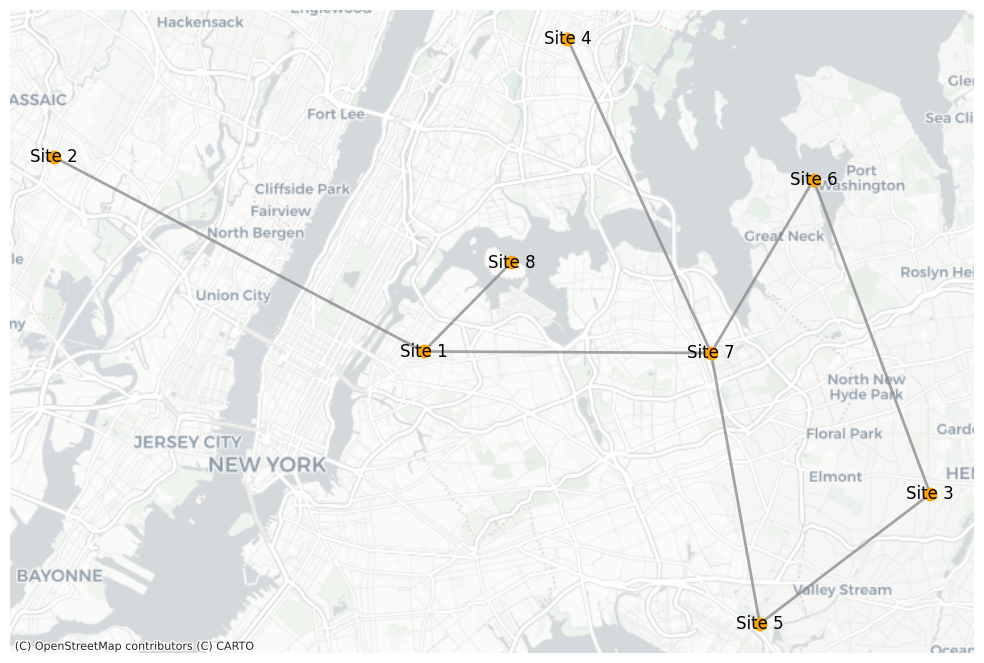

In [71]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point, LineString

# Example site coordinates (lon, lat)
site_coords = {
    0: (-73.92473, 40.757490),
    1: (-74.117797, 40.8343637),
    2: (-73.660261, 40.701116),
    3: (-73.849618, 40.88101),
    4: (-73.749213, 40.649716),
    5: (-73.721110, 40.825360),
    6: (-73.774628, 40.7568889),
    7: (-73.878915, 40.7926903)
}

# Define graph edges (pairs of site IDs)
edges = [(0, 1), (0, 7), (0, 6), (3, 6), (4, 6), (4, 2), (2, 5), (6, 5)]

# Build GeoDataFrame for nodes
nodes = gpd.GeoDataFrame(
    {"site": list(site_coords.keys()),
     "geometry": [Point(lon, lat) for lon, lat in site_coords.values()]},
    crs="EPSG:4326"
).to_crs(epsg=3857)

# Build GeoDataFrame for edges
edge_geoms = []
for a, b in edges:
    p1 = nodes.loc[nodes["site"] == a, "geometry"].iloc[0]
    p2 = nodes.loc[nodes["site"] == b, "geometry"].iloc[0]
    edge_geoms.append(LineString([p1, p2]))

edges_gdf = gpd.GeoDataFrame({"edge": edges}, geometry=edge_geoms, crs=nodes.crs)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
edges_gdf.plot(ax=ax, color="gray", linewidth=2, alpha=0.7, zorder=1)
nodes.plot(ax=ax, color="orange", markersize=80, zorder=2)

ctx.add_basemap(ax, crs=nodes.crs, source=ctx.providers.CartoDB.Positron)

# Label nodes
for _, row in nodes.iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.text(x, y, f"Site {row["site"] + 1}", fontsize=12, color="black", ha="center", va="center")
    # ax.text(x, y, str(row["site"]), fontsize=9, color="black", ha="center", va="center")

ax.set_axis_off()
plt.tight_layout()
plt.show()


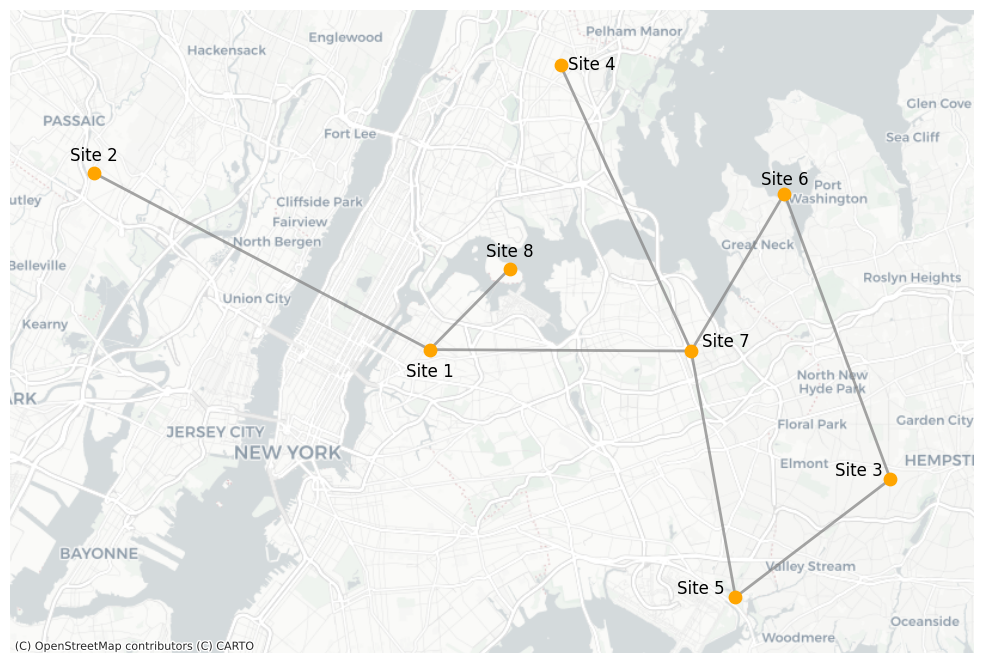

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point, LineString

# Site coordinates
site_coords = {
    0: (-73.92473, 40.757490),
    1: (-74.117797, 40.8343637),
    2: (-73.660261, 40.701116),
    3: (-73.849618, 40.88101),
    4: (-73.749213, 40.649716),
    5: (-73.721110, 40.825360),
    6: (-73.774628, 40.7568889),
    7: (-73.878915, 40.7926903)
}

# Per-site label configuration
label_settings = {
    0: {"text": "Site 1",        "dx":   0, "dy":  -2000, "fontsize": 12, "color": "Black",    "ha": "center", "va": "bottom"},
    1: {"text": "Site 2",        "dx":   0, "dy":  500, "fontsize": 12, "color": "Black",    "ha": "center", "va": "bottom"},
    2: {"text": "Site 3",        "dx":   -2000, "dy":  0, "fontsize": 12, "color": "Black",    "ha": "center", "va": "bottom"},
    3: {"text": "Site 4",        "dx":   2000, "dy":  -500, "fontsize": 12, "color": "Black",    "ha": "center", "va": "bottom"},
    4: {"text": "Site 5",        "dx":   -2200, "dy":  0, "fontsize": 12, "color": "Black",    "ha": "center", "va": "bottom"},
    5: {"text": "Site 6",        "dx":   0, "dy":  300, "fontsize": 12, "color": "Black",    "ha": "center", "va": "bottom"},
    6: {"text": "Site 7",        "dx":   2200, "dy":  0, "fontsize": 12, "color": "Black",    "ha": "center", "va": "bottom"},
    7: {"text": "Site 8",        "dx":   0, "dy":  500, "fontsize": 12, "color": "Black",    "ha": "center", "va": "bottom"},
}

# Define edges
edges = [(0, 1), (0, 7), (0, 6), (3, 6), (4, 6), (4, 2), (2, 5), (6, 5)]

# Build GeoDataFrame for nodes
nodes = gpd.GeoDataFrame(
    {"site": list(site_coords.keys()),
     "geometry": [Point(lon, lat) for lon, lat in site_coords.values()]},
    crs="EPSG:4326"
).to_crs(epsg=3857)

# Build GeoDataFrame for edges
edge_geoms = []
for a, b in edges:
    p1 = nodes.loc[nodes["site"] == a, "geometry"].iloc[0]
    p2 = nodes.loc[nodes["site"] == b, "geometry"].iloc[0]
    edge_geoms.append(LineString([p1, p2]))

edges_gdf = gpd.GeoDataFrame({"edge": edges}, geometry=edge_geoms, crs=nodes.crs)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
edges_gdf.plot(ax=ax, color="gray", linewidth=2, alpha=0.7, zorder=1)
nodes.plot(ax=ax, color="orange", markersize=80, zorder=2)

ctx.add_basemap(ax, crs=nodes.crs, source=ctx.providers.CartoDB.Positron)

# Draw labels using custom settings
for _, row in nodes.iterrows():
    site_id = row["site"]
    x, y = row.geometry.x, row.geometry.y
    
    settings = label_settings.get(site_id, {})
    
    ax.text(
        x + settings.get("dx", 0),
        y + settings.get("dy", 0),
        settings.get("text", f"Site {site_id}"),
        fontsize=settings.get("fontsize", 12),
        color=settings.get("color", "black"),
        ha=settings.get("ha", "center"),
        va=settings.get("va", "center"),
        zorder=3
    )

ax.set_axis_off()

ax.set_xlim(-8256103.351585877, -8194474.815392972)
ax.set_ylim(4957241.851393969, 4998375.966141651)

plt.tight_layout()
plt.show()


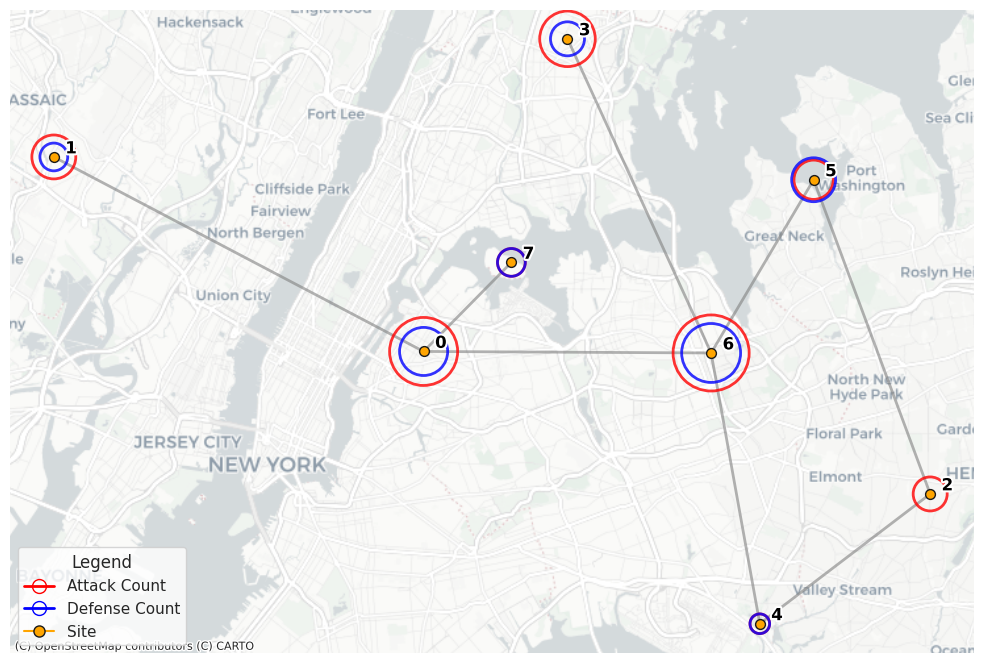

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point, LineString
from matplotlib.lines import Line2D

# Example site coordinates (lon, lat)
site_coords = {
    0: (-73.92473, 40.757490),
    1: (-74.117797, 40.8343637),
    2: (-73.660261, 40.701116),
    3: (-73.849618, 40.88101),
    4: (-73.749213, 40.649716),
    5: (-73.721110, 40.825360),
    6: (-73.774628, 40.7568889),
    7: (-73.878915, 40.7926903)
}

attack_counts = {0: 12, 1: 5, 2: 3, 3: 8, 4: 1, 5: 4, 6: 15, 7: 2}
def_counts =    {0: 6, 1: 2, 2: 0, 3: 3, 4: 1, 5: 5, 6: 9, 7: 2}

edges = [(0, 1), (0, 7), (0, 6), (3, 6), (4, 6), (4, 2), (2, 5), (6, 5)]

# Convert to GeoDataFrames
nodes = gpd.GeoDataFrame(
    {"site": list(site_coords.keys()),
     "geometry": [Point(lon, lat) for lon, lat in site_coords.values()]},
    crs="EPSG:4326"
).to_crs(epsg=3857)

edge_geoms = []
for a, b in edges:
    p1 = nodes.loc[nodes["site"] == a, "geometry"].iloc[0]
    p2 = nodes.loc[nodes["site"] == b, "geometry"].iloc[0]
    edge_geoms.append(LineString([p1, p2]))

edges_gdf = gpd.GeoDataFrame({"edge": edges}, geometry=edge_geoms, crs=nodes.crs)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))
edges_gdf.plot(ax=ax, color="gray", linewidth=2, alpha=0.6, zorder=1)
ctx.add_basemap(ax, crs=nodes.crs, source=ctx.providers.CartoDB.Positron)

attack_scale = 200
def_scale = 200

# Plot proportional hollow circles
for _, row in nodes.iterrows():
    site = row["site"]
    x, y = row.geometry.x, row.geometry.y
    attack_radius = attack_counts[site] * attack_scale
    def_radius = def_counts[site] * def_scale

    ax.scatter(x, y, s=def_radius, facecolors='none', edgecolors='blue',
               linewidth=2, alpha=0.8, zorder=3)
    ax.scatter(x, y, s=attack_radius, facecolors='none', edgecolors='red',
               linewidth=2, alpha=0.8, zorder=2)

# Plot node centers
nodes.plot(ax=ax, color="orange", markersize=50, edgecolor="k", zorder=4)

# -----------------------
# Offset & style labels
# -----------------------
x_offset = 1000     # meters east
y_offset = 500     # meters north

for _, row in nodes.iterrows():
    x, y = row.geometry.x + x_offset, row.geometry.y + y_offset
    ax.text(
        x, y, str(row["site"]+1),
        fontsize=12, fontweight="bold", color="black",
        ha="center", va="center", zorder=5,
        path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=3, foreground="white")]
    )

# Custom hollow legend
legend_elements = [
    Line2D([0], [0], marker='o', color='red', label='Attack Count',
           markerfacecolor='none', markersize=10, linewidth=2),
    Line2D([0], [0], marker='o', color='blue', label='Defense Count',
           markerfacecolor='none', markersize=10, linewidth=2),
    Line2D([0], [0], marker='o', color='orange', label='Site',
           markerfacecolor='orange', markeredgecolor='k', markersize=8)
]
ax.legend(handles=legend_elements, loc="lower left", title="Legend")

ax.set_axis_off()
# ax.set_title("Graph Structure with Attack/Defense Activity", fontsize=14)
plt.tight_layout()
plt.show()






NEW X limits: (np.float64(-8256103.351585877), np.float64(-8194474.815392972))
NEW Y limits: (np.float64(4957241.851393969), np.float64(4998375.966141651))


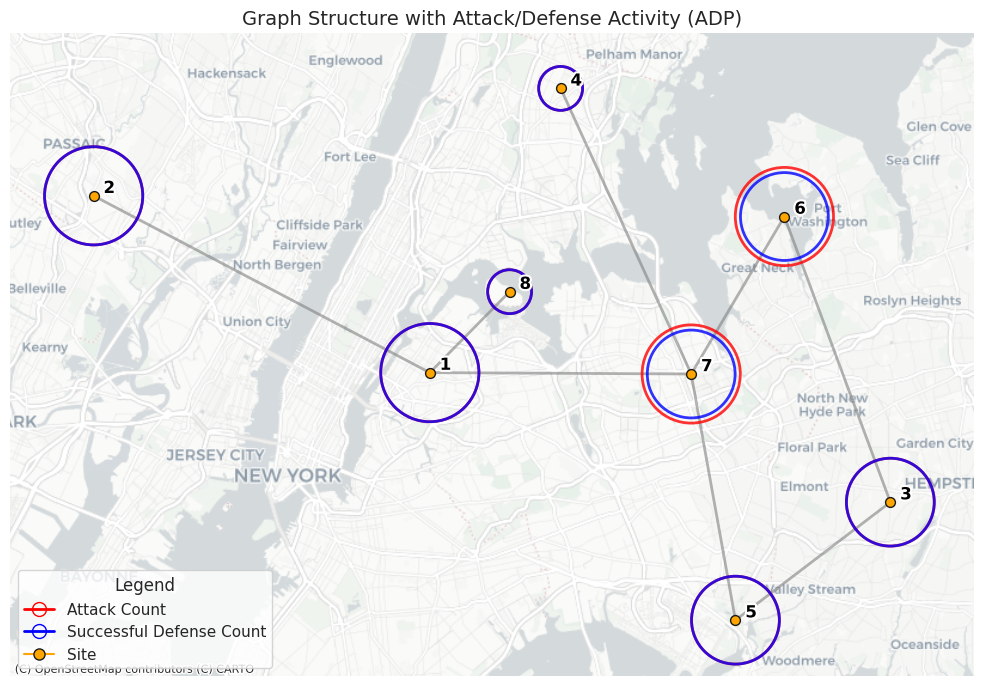

In [93]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point, LineString
from matplotlib.lines import Line2D

# Example site coordinates (lon, lat)
site_coords = {
    0: (-73.92473, 40.757490),
    1: (-74.117797, 40.8343637),
    2: (-73.660261, 40.701116),
    3: (-73.849618, 40.88101),
    4: (-73.749213, 40.649716),
    5: (-73.721110, 40.825360),
    6: (-73.774628, 40.7568889),
    7: (-73.878915, 40.7926903)
}

# -------------------------------
# Manual counts (fill these yourself) -- ADP POLICY
# -------------------------------
attack_counts = {
    0: 5,
    1: 5,
    2: 4,
    3: 1,
    4: 4,
    5: 5,
    6: 5,
    7: 1
}
def_counts = {
    0: 5,
    1: 5,
    2: 4,
    3: 1,
    4: 4,
    5: 4,
    6: 4,
    7: 1
}

edges = [(0, 1), (0, 7), (0, 6), (3, 6), (4, 6), (4, 2), (2, 5), (6, 5)]

# Convert to GeoDataFrames
nodes = gpd.GeoDataFrame(
    {"site": list(site_coords.keys()),
     "geometry": [Point(lon, lat) for lon, lat in site_coords.values()]},
    crs="EPSG:4326"
).to_crs(epsg=3857)

edge_geoms = []
for a, b in edges:
    p1 = nodes.loc[nodes["site"] == a, "geometry"].iloc[0]
    p2 = nodes.loc[nodes["site"] == b, "geometry"].iloc[0]
    edge_geoms.append(LineString([p1, p2]))

edges_gdf = gpd.GeoDataFrame({"edge": edges}, geometry=edge_geoms, crs=nodes.crs)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))
edges_gdf.plot(ax=ax, color="gray", linewidth=2, alpha=0.6, zorder=1)
ctx.add_basemap(ax, crs=nodes.crs, source=ctx.providers.CartoDB.Positron)

attack_scale = 5
def_scale = 5

# Plot proportional hollow circles
for _, row in nodes.iterrows():
    site = row["site"]
    x, y = row.geometry.x, row.geometry.y
    attack_radius = attack_counts[site] * 1000
    def_radius = def_counts[site] * 1000

    ax.scatter(x, y, s=def_radius, facecolors='none', edgecolors='blue',
               linewidth=2, alpha=0.8, zorder=3)
    ax.scatter(x, y, s=attack_radius, facecolors='none', edgecolors='red',
               linewidth=2, alpha=0.8, zorder=2)

# Plot node centers
nodes.plot(ax=ax, color="orange", markersize=50, edgecolor="k", zorder=4)

# -----------------------
# Offset & style labels
# -----------------------
x_offset = 1000     # meters east
y_offset = 500     # meters north

for _, row in nodes.iterrows():
    x, y = row.geometry.x + x_offset, row.geometry.y + y_offset
    ax.text(
        x, y, str(row["site"]+1),
        fontsize=12, fontweight="bold", color="black",
        ha="center", va="center", zorder=5,
        path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=3, foreground="white")]
    )

# Custom hollow legend
legend_elements = [
    Line2D([0], [0], marker='o', color='red', label='Attack Count',
           markerfacecolor='none', markersize=10, linewidth=2),
    Line2D([0], [0], marker='o', color='blue', label='Successful Defense Count',
           markerfacecolor='none', markersize=10, linewidth=2),
    Line2D([0], [0], marker='o', color='orange', label='Site',
           markerfacecolor='orange', markeredgecolor='k', markersize=8)
]
ax.legend(handles=legend_elements, loc="lower left", title="Legend")

ax.set_axis_off()
ax.set_title("Graph Structure with Attack/Defense Activity (ADP)", fontsize=14)

# --- Fix cutoff by zooming out slightly ---
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# 5% padding is usually perfect
pad_x = (xmax - xmin) * 0.05
pad_y = (ymax - ymin) * 0.05

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)


# --- PRINT NEW LIMITS AFTER PADDING ---
print("NEW X limits:", ax.get_xlim())
print("NEW Y limits:", ax.get_ylim())

# --- HARD-CODED LIMITS HERE ---
ax.set_xlim(-8256103.351585877, -8194474.815392972)
ax.set_ylim(4957241.851393969, 4998375.966141651)

plt.tight_layout()
plt.show()

NEW X limits: (np.float64(-8256103.351585877), np.float64(-8194474.815392972))
NEW Y limits: (np.float64(4957241.851393969), np.float64(4998375.966141651))


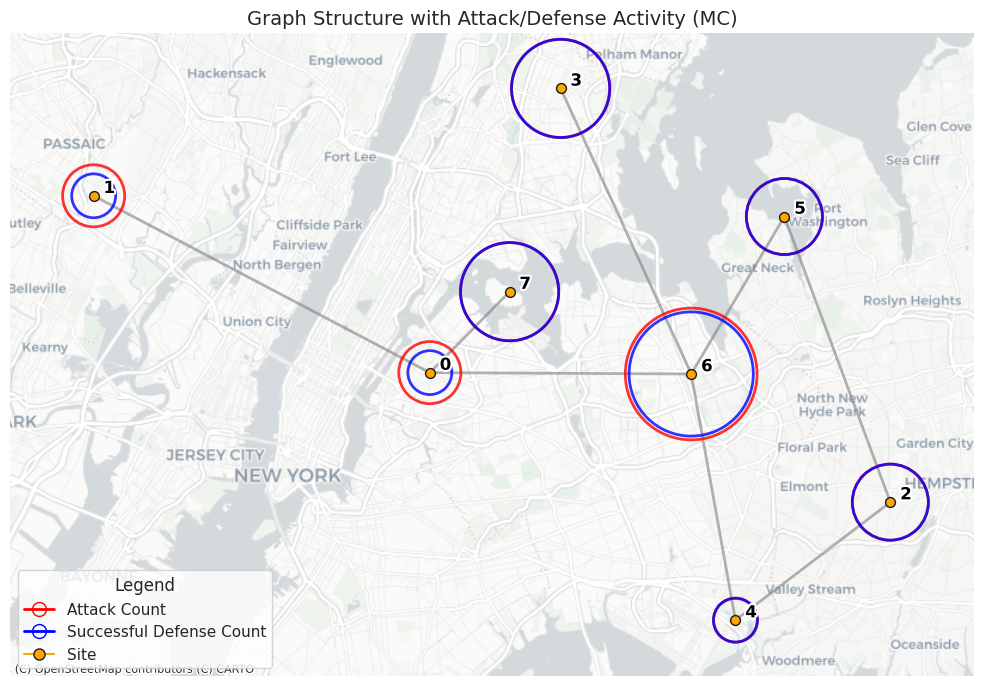

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point, LineString
from matplotlib.lines import Line2D

# Example site coordinates (lon, lat)
site_coords = {
    0: (-73.92473, 40.757490),
    1: (-74.117797, 40.8343637),
    2: (-73.660261, 40.701116),
    3: (-73.849618, 40.88101),
    4: (-73.749213, 40.649716),
    5: (-73.721110, 40.825360),
    6: (-73.774628, 40.7568889),
    7: (-73.878915, 40.7926903)
}

# -------------------------------
# Manual counts (fill these yourself) -- MC POLICY
# -------------------------------
attack_counts = {
    0: 2,
    1: 2,
    2: 3,
    3: 5,
    4: 1,
    5: 3,
    6: 9,
    7: 5
}
def_counts = {
    0: 1,
    1: 1,
    2: 3,
    3: 5,
    4: 1,
    5: 3,
    6: 8,
    7: 5
}

edges = [(0, 1), (0, 7), (0, 6), (3, 6), (4, 6), (4, 2), (2, 5), (6, 5)]

# Convert to GeoDataFrames
nodes = gpd.GeoDataFrame(
    {"site": list(site_coords.keys()),
     "geometry": [Point(lon, lat) for lon, lat in site_coords.values()]},
    crs="EPSG:4326"
).to_crs(epsg=3857)

edge_geoms = []
for a, b in edges:
    p1 = nodes.loc[nodes["site"] == a, "geometry"].iloc[0]
    p2 = nodes.loc[nodes["site"] == b, "geometry"].iloc[0]
    edge_geoms.append(LineString([p1, p2]))

edges_gdf = gpd.GeoDataFrame({"edge": edges}, geometry=edge_geoms, crs=nodes.crs)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))
edges_gdf.plot(ax=ax, color="gray", linewidth=2, alpha=0.6, zorder=1)
ctx.add_basemap(ax, crs=nodes.crs, source=ctx.providers.CartoDB.Positron)

attack_scale = 5
def_scale = 5

# Plot proportional hollow circles
for _, row in nodes.iterrows():
    site = row["site"]
    x, y = row.geometry.x, row.geometry.y
    attack_radius = attack_counts[site] * 1000
    def_radius = def_counts[site] * 1000

    ax.scatter(x, y, s=def_radius, facecolors='none', edgecolors='blue',
               linewidth=2, alpha=0.8, zorder=3)
    ax.scatter(x, y, s=attack_radius, facecolors='none', edgecolors='red',
               linewidth=2, alpha=0.8, zorder=2)

# Plot node centers
nodes.plot(ax=ax, color="orange", markersize=50, edgecolor="k", zorder=4)

# -----------------------
# Offset & style labels
# -----------------------
x_offset = 1000     # meters east
y_offset = 500     # meters north

for _, row in nodes.iterrows():
    x, y = row.geometry.x + x_offset, row.geometry.y + y_offset
    ax.text(
        x, y, str(row["site"]+1),
        fontsize=12, fontweight="bold", color="black",
        ha="center", va="center", zorder=5,
        path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=3, foreground="white")]
    )

# Custom hollow legend
legend_elements = [
    Line2D([0], [0], marker='o', color='red', label='Attack Count',
           markerfacecolor='none', markersize=10, linewidth=2),
    Line2D([0], [0], marker='o', color='blue', label='Successful Defense Count',
           markerfacecolor='none', markersize=10, linewidth=2),
    Line2D([0], [0], marker='o', color='orange', label='Site',
           markerfacecolor='orange', markeredgecolor='k', markersize=8)
]
ax.legend(handles=legend_elements, loc="lower left", title="Legend")

ax.set_axis_off()
ax.set_title("Graph Structure with Attack/Defense Activity (MC)", fontsize=14)

# --- Fix cutoff by zooming out slightly ---
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# 5% padding is usually perfect
pad_x = (xmax - xmin) * 0.05
pad_y = (ymax - ymin) * 0.05

ax.set_xlim(xmin - pad_x, xmax + pad_x)
ax.set_ylim(ymin - pad_y, ymax + pad_y)


# --- PRINT NEW LIMITS AFTER PADDING ---
print("NEW X limits:", ax.get_xlim())
print("NEW Y limits:", ax.get_ylim())

# --- HARD-CODED LIMITS HERE ---
ax.set_xlim(-8256103.351585877, -8194474.815392972)
ax.set_ylim(4957241.851393969, 4998375.966141651)

plt.tight_layout()
plt.show()



In [76]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

# Example: replace with actual site lat/lon (NYC area)
site_coords = {
    1: (-73.92473, 40.757490),  # Astoria
    2: (-74.117797, 40.8343637),  # Rutherford
    3: (-73.660261, 40.701116),  # West Hempstead
    4: (-73.849618, 40.88101),  # East Bronx
    5: (-73.749213, 40.649716),  # JFK
    6: (-73.721110, 40.825360),  # Manhasset Bay
    7: (-73.774628, 40.7568889),  # Bayside
    8: (-73.878915, 40.7926903),  #Riker's Island
    9: (-73.915209, 40.679680),  # Brooklyn
    10: (-73.994368, 40.699360), # Ft.Green Park
}

t=50
step = df[df["t"] == t]

# Build a GeoDataFrame of sites
records = []
for sid, (lon, lat) in site_coords.items():
    role = step.loc[step["site"] == sid, "role"].iloc[0] if sid in step["site"].values else None
    records.append({"site": sid, "role": role, "geometry": Point(lon, lat)})

gdf = gpd.GeoDataFrame(records, crs="EPSG:4326").to_crs(epsg=3857)  # web mercator for tiles

    # Make sure gdf is in Web Mercator
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color="red")

# Add a Carto basemap (stable in new versions)
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)

# Plot undefended
gdf[gdf["role"] == "Defense"].plot(ax=ax, marker="s", facecolor="white", edgecolor="blue", markersize=200, label="Undefended")
# Plot attacks
gdf[gdf["role"] == "Attack"].plot(ax=ax, marker="x", color="red", markersize=120, label="Attack")
# Plot neutral
gdf[gdf["role"].isna()].plot(ax=ax, color="green", markersize=50, label="Other Sites")

for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.text(x, y, str(row["site"]), fontsize=8, color="black")

ax.set_axis_off()
ax.margins(0)
ax.set_title(f"Defense Map at timestep {t}")
ax.legend()
# expand bounds so you see full city, not just points
xmin, ymin, xmax, ymax = gdf.total_bounds
ax.set_xlim(xmin - 5000, xmax + 5000)
ax.set_ylim(ymin - 5000, ymax + 5000)
plt.show()

KeyError: 't'

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

t = 50
step = df[df["t"] == t]

# --- Build GeoDataFrame of sites at this timestep ---
records = []
for sid, (lon, lat) in site_coords.items():
    role = step.loc[step["site"] == sid, "role"].iloc[0] if sid in step["site"].values else None
    records.append({"site": sid, "role": role, "geometry": Point(lon, lat)})

gdf = gpd.GeoDataFrame(records, crs="EPSG:4326").to_crs(epsg=3857)

# --- Count ALL attacks across dataset (all timesteps) ---
total_attack_counts = df[df["role"] == "Attack"].groupby("site").size()
gdf["attack_count"] = gdf["site"].map(total_attack_counts).fillna(0)

# --- Count ALL undefenses across dataset (all timesteps) ---
total_attack_counts = df[df["role"] == "Defense"].groupby("site").size()
gdf["gap_count"] = gdf["site"].map(total_attack_counts).fillna(0)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 12))

# Baseline: all sites shown equally
gdf.plot(ax=ax, color="black", markersize=60, zorder=3, label="Sites")

# Attack-intensity circles
circle_sizes = gdf["attack_count"] * 1000 + 200
gdf.plot(
    ax=ax,
    markersize=circle_sizes,
    marker="o",
    facecolor="none",
    edgecolor="red",
    linewidth=2,
    alpha=0.5,
    zorder=4,
    label="Attack Intensity (Total)"
)

# Gap-intensity circles
circle_sizes = gdf["gap_count"] * 1000 + 200
gdf.plot(
    ax=ax,
    markersize=circle_sizes,
    marker="o",
    facecolor="none",
    edgecolor="blue",
    linewidth=2,
    alpha=0.5,
    zorder=4,
    label="Gap Severity (Total)"
)

# Labels
for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.text(x+500, y+500, str(row["site"]), fontsize=8, color="black")

# Basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.CartoDB.Positron)

# Clean look
ax.set_axis_off()
ax.margins(0)
ax.legend()

# Expand bounds
xmin, ymin, xmax, ymax = gdf.total_bounds
ax.set_xlim(xmin - 5000, xmax + 5000)
ax.set_ylim(ymin - 5000, ymax + 5000)

plt.show()


Number of plotted sites: 8
   site  attack_count  gap_count                          geometry
0     0            12          6  POINT (-8229263.301 4976637.032)
1     1             5          2   POINT (-8250755.421 4987940.96)
2     2             3          0  POINT (-8199822.746 4968355.798)
3     3             8          3  POINT (-8220901.871 4994806.477)
4     4             1          1  POINT (-8209724.838 4960811.341)
5     5             4          5   POINT (-8206596.426 4986616.33)
6     6            15          9  POINT (-8212554.022 4976548.695)
7     7             2          2  POINT (-8224163.198 4981811.452)


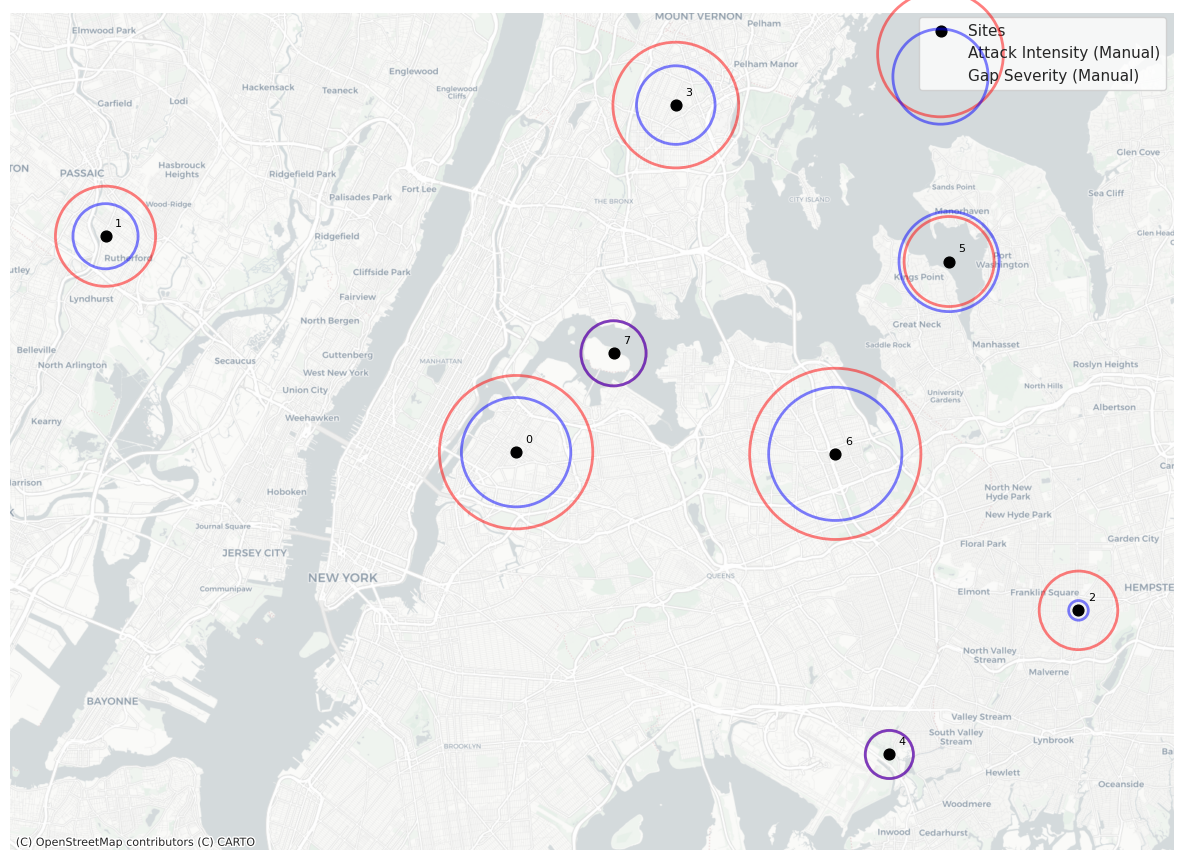

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

# -------------------------------
# Manual counts (fill these yourself)
# -------------------------------
attack_counts = {
    0: 12,
    1: 5,
    2: 3,
    3: 8,
    4: 1,
    5: 4,
    6: 15,
    7: 2
}
gap_counts = {
    0: 6,
    1: 2,
    2: 0,
    3: 3,
    4: 1,
    5: 5,
    6: 9,
    7: 2
}

# -------------------------------
# Example site coordinates (lon, lat)
# -------------------------------
site_coords = {
    0: (-73.92473, 40.757490),
    1: (-74.117797, 40.8343637),
    2: (-73.660261, 40.701116),
    3: (-73.849618, 40.88101),
    4: (-73.749213, 40.649716),
    5: (-73.721110, 40.825360),
    6: (-73.774628, 40.7568889),
    7: (-73.878915, 40.7926903)
}

# -------------------------------
# Build GeoDataFrame
# -------------------------------

valid_sites = set(site_coords.keys())
attack_counts = {k: v for k, v in attack_counts.items() if k in valid_sites}
gap_counts = {k: v for k, v in gap_counts.items() if k in valid_sites}


records = []
for sid, (lon, lat) in site_coords.items():
    records.append({
        "site": sid,
        "attack_count": attack_counts.get(sid, 0),
        "gap_count": gap_counts.get(sid, 0),
        "geometry": Point(lon, lat)
    })

gdf = gpd.GeoDataFrame(records, crs="EPSG:4326").to_crs(epsg=3857)

print("Number of plotted sites:", len(gdf))
print(gdf[["site", "attack_count", "gap_count", "geometry"]])



# -------------------------------
# Plot
# -------------------------------
plt.close('all')
fig, ax = plt.subplots(figsize=(12, 12))


# Baseline sites
gdf.plot(ax=ax, color="black", markersize=60, zorder=3, label="Sites")

# --- Attack intensity (red circles) ---
circle_sizes = gdf["attack_count"] * 1000 + 200
gdf.plot(
    ax=ax,
    markersize=circle_sizes,
    marker="o",
    facecolor="none",
    edgecolor="red",
    linewidth=2,
    alpha=0.5,
    zorder=4,
    label="Attack Intensity (Manual)"
)

# --- Gap severity (blue circles) ---
circle_sizes = gdf["gap_count"] * 1000 + 200
gdf.plot(
    ax=ax,
    markersize=circle_sizes,
    marker="o",
    facecolor="none",
    edgecolor="blue",
    linewidth=2,
    alpha=0.5,
    zorder=5,
    label="Gap Severity (Manual)"
)

# --- Labels ---
for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    ax.text(x + 500, y + 500, f"{row['site']}", fontsize=8, color="black")

# --- Basemap ---
ctx.add_basemap(
    ax,
    crs=gdf.crs,
    source=ctx.providers.CartoDB.Positron,  # reliable provider
    zoom=12,
    zorder=0,
    alpha=1.0
)

# --- Clean look ---
ax.set_axis_off()
ax.legend()

# Expand bounds
xmin, ymin, xmax, ymax = gdf.total_bounds
ax.set_xlim(xmin - 5000, xmax + 5000)
ax.set_ylim(ymin - 5000, ymax + 5000)

plt.tight_layout()
plt.show()


In [ ]:
print(gdf[gdf["geometry"].is_empty | gdf["geometry"].isna()])


In [ ]:
print("site_coords keys:", sorted(site_coords.keys()))
print("attack_counts keys:", sorted(attack_counts.keys()))
print("gap_counts keys:", sorted(gap_counts.keys()))
